In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import statistics 

C:\Users\17857\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
County = pd.read_csv('data\Counties.csv')
County

,Unnamed: 0,CTYNAME,age_grp,N0,V0_1,V0_2,V0_3,V0_4,S0_1,S0_2,S0_3,S0_4,R0,theta_1,theta_2,theta_3,theta_4
0,1,Anderson,0_4,3009,2943,2492,2932,2935,66,517,77,74,0,1,1,1,1
1,2,Anderson,20,45233,44245,37460,44073,44082,988,7773,1160,1151,0,0,0,0,0
2,3,Anderson,5_19,9494,7527,6373,7497,7503,1967,3121,1997,1991,0,0,0,0,0
3,4,Andrews,0_4,1473,1454,1233,1435,1437,19,240,38,36,0,1,1,1,1
4,5,Andrews,20,12344,12183,10331,12027,12030,161,2013,317,314,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,Zapata,20,8958,8935,7592,8728,8730,23,1366,230,228,0,0,0,0,0
746,747,Zapata,5_19,3807,3077,2614,3008,3010,730,1193,799,797,0,0,0,0,0
747,748,Zavala,0_4,734,733,623,715,716,1,111,19,18,0,0,0,0,0
748,749,Zavala,20,6263,6257,5317,6102,6104,6,946,161,159,0,0,0,0,0


In [3]:
name_list = County['CTYNAME'].unique().tolist()
name_list[2]

'Angelina'

In [4]:
value = County.loc[(County['CTYNAME'] == name_list[2]) & (County['age_grp'] =='20'), 'N0'].values[0]
value

63009

In [5]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(3):
        rate += aW*CWW[i][n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

In [6]:
#define paramters 
#VE for three age group epsilon 
epsilon=[0.93, 0.97, 0.97]

#Exposed to infectious rate, sigma
sigma_ub=float(1/7)
sigma_lb=float(1/14)
sigma_pe=(sigma_ub+sigma_lb)/2

#I to R rate, gamma 1
gamma1_ub=float(1/4)
gamma1_lb=float(1/7)
gamma1_pe=(gamma1_ub+gamma1_lb)/2

#H to R rate, gamma 2 
gamma2_ub=float(1/5)
gamma2_lb=float(1/6)
gamma2_pe=(gamma2_ub+gamma2_lb)/2

#IHR
IHR_ub=[gamma1_ub*0.29/(1-0.29),gamma1_ub*0.13/(1-0.13),gamma1_ub*0.17/(1-0.17)]
IHR_lb=[gamma1_lb*0.29/(1-0.29),gamma1_lb*0.13/(1-0.13),gamma1_lb*0.17/(1-0.17)]
IHR_pe=[(IHR_ub[0]+IHR_lb[0])/2,(IHR_ub[1]+IHR_lb[1])/2,(IHR_ub[2]+IHR_lb[2])/2]

#HDR
HDR_ub=[gamma2_ub*(0.3/29)/(1-(0.3/29)),gamma2_ub*(0.3/13)/(1-(0.3/13)),gamma2_ub*(0.3/17)/(1-(0.3/17))]
HDR_lb=[gamma2_lb*(0.1/29)/(1-(0.1/29)),gamma2_lb*(0.1/13)/(1-(0.1/13)),gamma2_lb*(0.1/17)/(1-(0.1/17))]
HDR_pe=[(HDR_ub[0]+HDR_lb[0])/2,(HDR_ub[1]+HDR_lb[1])/2,(HDR_ub[2]+HDR_lb[2])/2]

#contact matrix
CM=[[1.4101, 2.5282, 4.91],[ 0.9290, 11.0091, 6.0771], [0.4884, 1.6387, 8.8461]]

In [7]:
def sim_sto1(x, County_name):
    Nd=50
    dt=1
    beta0=1.38097639
    beta1=0.10899939
    beta2=0.07418611
    std0=1.63867112e-01
    std1=5.90499822e-04
    std2=1.01007707e-03
    
    n1=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'N0'].values[0]
    n2=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'N0'].values[0]
    n3=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'N0'].values[0]
    N=[n1, n2, n3]
    
    v1=max(County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'V0_1'].values[0],County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'V0_4'].values[0])
    v2=max(County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'V0_1'].values[0],County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'V0_4'].values[0])
    v3=max(County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'V0_1'].values[0],County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'V0_4'].values[0])
    V=[v1, v2, v3]
    theta=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'theta_2'].values[0]

    S = np.zeros([3])
    E = np.zeros([3])
    I = np.zeros([3])
    R = np.zeros([3])
    H = np.zeros([3])
    D = np.zeros([3])
    
    S_new = np.zeros([3])
    E_new = np.zeros([3])
    I_new = np.zeros([3])
    R_new = np.zeros([3])
    H_new = np.zeros([3])
    D_new = np.zeros([3])
    V_new = np.zeros([3])
    
    case_count=0
    hosp_count=0
    death_count=0
    case_count0=0
    hosp_count0=0
    death_count0=0
    case_count1=0
    hosp_count1=0
    death_count1=0
    case_count2=0
    hosp_count2=0
    death_count2=0
    
    cumcase=np.zeros([Nd])
    cumhosp=np.zeros([Nd])
    cumdeath=np.zeros([Nd])
    cumcase0=np.zeros([Nd])
    cumhosp0=np.zeros([Nd])
    cumdeath0=np.zeros([Nd])
    cumcase1=np.zeros([Nd])
    cumhosp1=np.zeros([Nd])
    cumdeath1=np.zeros([Nd])
    cumcase2=np.zeros([Nd])
    cumhosp2=np.zeros([Nd])
    cumdeath2=np.zeros([Nd])
    cumI=np.zeros([Nd])
    cumH=np.zeros([Nd])
    cumD=np.zeros([Nd])
    
    for n in range(3):
        S[n]=N[n]-V[n]
    I[1]=1
    
        
    for tt in range(int(Nd/dt)):
        np.random.seed()
        sig=np.random.uniform(sigma_lb,sigma_ub)
        gam1=np.random.uniform(gamma1_lb,gamma1_ub)
        gam2=np.random.uniform(gamma2_lb,gamma2_ub)
        IHR=[np.random.uniform(IHR_lb[0],IHR_ub[0]),np.random.uniform(IHR_lb[1],IHR_ub[1]),np.random.uniform(IHR_lb[2],IHR_ub[2])]
        HDR=[np.random.uniform(HDR_lb[0],HDR_ub[0]),np.random.uniform(HDR_lb[1],HDR_ub[1]),np.random.uniform(HDR_lb[2],HDR_ub[2])]

        for i in range(3):
            if i==0:
                rnd=np.random.normal(0, std0, 1)
                beta=beta0+2*rnd
                eps=epsilon[0]
                ihr=IHR[0]
                hdr=HDR[0]
                the=theta
            if i==1:
                rnd=np.random.normal(0, std1, 1)
                beta=beta1+2*rnd
                eps=epsilon[1]
                ihr=IHR[1]
                hdr=HDR[1]
                the=0
            if i==2:
                rnd=np.random.normal(0, std2, 1)
                beta=beta2+2*rnd
                eps=epsilon[2]
                ihr=IHR[2]
                hdr=HDR[2]
                the=0
            S_new[i]=S[i]-beta*computerate(i, CM, 1, I, N)*S[i]
            V_new[i]=V[i]-beta*computerate(i, CM, 1, I, N)*V[i]*(1-eps)+the
            E_new[i]=E[i]+beta*computerate(i, CM, 1, I, N)*S[i]+beta*computerate(i, CM, 1, I, N)*V[i]*(1-eps)-sig*E[i]
            I_new[i]=I[i]+sig*E[i]-(ihr+gam1)*I[i]
            case_count=case_count+sig*E[i]
            cumcase[tt]=case_count
            H_new[i]=H[i]+ihr*I[i]-(hdr+gam2)*H[i]
            hosp_count=hosp_count+ihr*I[i]
            cumhosp[tt]=hosp_count
            R_new[i]=R[i]+gam1*I[i]+gam2*H[i]
            D_new[i]=D[i]+hdr*H[i]
            death_count=death_count+hdr*H[i]
            cumdeath[tt]=death_count
            if i==0:
                case_count0=case_count0+sig*E[i]
                cumcase0[tt]=case_count0
                hosp_count0=hosp_count0+ihr*I[i]
                cumhosp0[tt]=hosp_count0
                death_count0=death_count0+hdr*H[i]
                cumdeath0[tt]=death_count0
            if i==1:
                case_count1=case_count1+sig*E[i]
                cumcase1[tt]=case_count1
                hosp_count1=hosp_count1+ihr*I[i]
                cumhosp1[tt]=hosp_count1
                death_count1=death_count1+hdr*H[i]
                cumdeath1[tt]=death_count1
            if i==2:
                case_count2=case_count2+sig*E[i]
                cumcase2[tt]=case_count2
                hosp_count2=hosp_count2+ihr*I[i]
                cumhosp2[tt]=hosp_count2
                death_count2=death_count2+hdr*H[i]
                cumdeath2[tt]=death_count2
            
        
        S = S_new; V=V_new; E=E_new; I=I_new; H=H_new; R=R_new; D=D_new;
        cumI[tt]=np.sum(I)
        cumH[tt]=np.sum(H)
        cumD[tt]=np.sum(D)
    
    fit_case=[cumcase[0],cumcase[11], cumcase[40], cumcase[44],100*sum(cumcase0)/sum(cumcase),100*sum(cumcase1)/sum(cumcase),100*sum(cumcase2)/sum(cumcase)]
    return fit_case, cumI, cumH, cumD, cumcase, cumhosp, cumdeath, cumcase0, cumhosp0, cumcase1, cumhosp1, cumcase2, cumhosp2
    

In [8]:
sim_sto1(0, 'Harris')

([0.0,
  1.44221573510431,
  8.830361779632117,
  10.127611198146921,
  29.406209618190516,
  64.90570366860929,
  5.688086713200225],
 array([0.81411346, 0.74008466, 0.62765859, 0.59078344, 0.57398748,
        0.56220775, 0.53975124, 0.59329032, 0.63182298, 0.70332969,
        0.63273433, 0.56609619, 0.62966833, 0.65892146, 0.68021809,
        0.75725357, 0.70004721, 0.76794135, 0.8111123 , 0.75800195,
        0.75692745, 0.75207299, 0.73644799, 0.75394574, 0.80549811,
        0.83350779, 0.91291201, 0.93997314, 0.87177687, 0.9047647 ,
        0.95913877, 1.00668867, 1.04009245, 1.06813356, 1.12460816,
        1.08454712, 1.23182948, 1.31074802, 1.31389821, 1.46599826,
        1.49590158, 1.47526163, 1.3822605 , 1.38533858, 1.44184838,
        1.59235174, 1.59870274, 1.67842441, 1.67274259, 1.84602478]),
 array([0.03006696, 0.0504543 , 0.0646278 , 0.07664156, 0.08744249,
        0.0919899 , 0.09996601, 0.10270741, 0.11019851, 0.11691777,
        0.12523728, 0.12358635, 0.12628572, 0.1

In [9]:
def sim_scenario(County_name):
    Nsim = 200
    Nd=50
    
    new_Inf = np.zeros([Nd, Nsim])
    new_Hosp = np.zeros([Nd, Nsim])
    new_Death = np.zeros([Nd, Nsim])
    cum_Inf = np.zeros([Nd, Nsim])
    cum_Hosp = np.zeros([Nd, Nsim])
    cum_Death = np.zeros([Nd, Nsim])
    cum_Inf0 = np.zeros([Nd, Nsim])
    cum_Inf1 = np.zeros([Nd, Nsim])
    cum_Inf2 = np.zeros([Nd, Nsim])
    cum_Hosp0 = np.zeros([Nd, Nsim])
    cum_Hosp1 = np.zeros([Nd, Nsim])
    cum_Hosp2 = np.zeros([Nd, Nsim])
    
    for i in range(Nsim):
        fit_case, cumI, cumH, cumD, cumcase, cumhosp, cumdeath, cumcase0, cumhosp0, cumcase1, cumhosp1, cumcase2, cumhosp2=sim_sto1(0, County_name)
        new_Inf[:,i]=cumI
        new_Hosp[:,i]=cumH
        new_Death[:,i]=cumD
        cum_Inf[:,i]=cumcase
        cum_Hosp[:,i]=cumhosp
        cum_Death[:,i]=cumdeath
        cum_Inf0[:,i]=cumcase0
        cum_Inf1[:,i]=cumcase1
        cum_Inf2[:,i]=cumcase2
        cum_Hosp0[:,i]=cumhosp0
        cum_Hosp1[:,i]=cumhosp1
        cum_Hosp2[:,i]=cumhosp2
    
    new_Inf_p = np.zeros([Nd, 25])
    new_Hosp_p = np.zeros([Nd, 25])
    new_Death_p = np.zeros([Nd, 25])
    cum_Inf_p = np.zeros([Nd, 25])
    cum_Hosp_p = np.zeros([Nd, 25])
    cum_Death_p = np.zeros([Nd, 25])
    cum_Inf0_p = np.zeros([Nd, 25])
    cum_Inf1_p = np.zeros([Nd, 25])
    cum_Inf2_p = np.zeros([Nd, 25])
    cum_Hosp0_p = np.zeros([Nd, 25])
    cum_Hosp1_p = np.zeros([Nd, 25])
    cum_Hosp2_p = np.zeros([Nd, 25])
    
    n1=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='0_4'), 'N0'].values[0]
    n2=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='5_19'), 'N0'].values[0]
    n3=County.loc[(County['CTYNAME'] ==County_name) & (County['age_grp'] =='20'), 'N0'].values[0]
    
    for i in range(Nd):
        new_Inf_p[i,:]=np.percentile(new_Inf[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_Hosp_p[i,:]=np.percentile(new_Hosp[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_Death_p[i,:]=np.percentile(new_Death[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf_p[i,:]=np.percentile(cum_Inf[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp_p[i,:]=np.percentile(cum_Hosp[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Death_p[i,:]=np.percentile(cum_Death[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf0_p[i,:] = np.percentile(cum_Inf0[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf1_p[i,:] = np.percentile(cum_Inf1[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Inf2_p[i,:] = np.percentile(cum_Inf2[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp0_p[i,:] = np.percentile(cum_Hosp0[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp1_p[i,:] = np.percentile(cum_Hosp1[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        cum_Hosp2_p[i,:] = np.percentile(cum_Hosp2[i,:],[0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

    return new_Inf_p, new_Hosp_p, new_Death_p, cum_Inf_p, cum_Hosp_p, cum_Death_p,cum_Inf0_p,cum_Inf1_p,cum_Inf2_p,cum_Hosp0_p,cum_Hosp1_p,cum_Hosp2_p, n1, n2, n3

In [10]:
new_Inf_p_A, new_Hosp_p_A, new_Death_p_A, cum_Inf_p_A, cum_Hosp_p_A, cum_Death_p_A,cum_Inf0_p_A,cum_Inf1_p_A,cum_Inf2_p_A,cum_Hosp0_p_A,cum_Hosp1_p_A,cum_Hosp2_p_A, n1_A, n2_A, n3_A=sim_scenario('Harris')

In [11]:
cum_Inf_p_A[49,12]

13.565332202627722

In [13]:
res_data = []
Nd=50

# Loop through name_list and assign a number
for i, County_name in enumerate(name_list, start=1):
    new_Inf_p_A, new_Hosp_p_A, new_Death_p_A, cum_Inf_p_A, cum_Hosp_p_A, cum_Death_p_A,cum_Inf0_p_A,cum_Inf1_p_A,cum_Inf2_p_A,cum_Hosp0_p_A,cum_Hosp1_p_A,cum_Hosp2_p_A, n1_A, n2_A, n3_A=sim_scenario(County_name)
    
    res_data.append({'CTYNAME': County_name,'0_4': n1_A, '5_19': n2_A, '20_': n3_A, 'Cum_inf': cum_Inf_p_A[Nd-1,12],'Cum_inf_low': cum_Inf_p_A[Nd-1,2],'Cum_inf_high': cum_Inf_p_A[Nd-1,22], 'Cum_inf_0': cum_Inf0_p_A[Nd-1,12], 'Cum_inf_0_low': cum_Inf0_p_A[Nd-1,2],'Cum_inf_0_high': cum_Inf0_p_A[Nd-1,22], 'Cum_inf_1': cum_Inf1_p_A[Nd-1,12], 'Cum_inf_1_low': cum_Inf1_p_A[Nd-1,2],'Cum_inf_1_high': cum_Inf1_p_A[Nd-1,22], 'Cum_inf_2': cum_Inf2_p_A[Nd-1,12], 'Cum_inf_2_low': cum_Inf2_p_A[Nd-1,2], 'Cum_inf_2_high': cum_Inf2_p_A[Nd-1,22], 'Cum_Hosp': cum_Hosp_p_A[Nd-1,12],'Cum_Hosp_low': cum_Hosp_p_A[Nd-1,2],'Cum_Hosp_high': cum_Hosp_p_A[Nd-1,22], 'Cum_Hosp_0': cum_Hosp0_p_A[Nd-1,12], 'Cum_Hosp_1': cum_Hosp1_p_A[Nd-1,12], 'Cum_Hosp_2': cum_Hosp2_p_A[Nd-1,12]})
    print(i)
    
# Create DataFrame
df = pd.DataFrame(res_data)

# Display DataFrame
print(df)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
      CTYNAME   0_4   5_19    20_    Cum_inf  Cum_inf_low  Cum_inf_high  \
0    Anderson  3009   9494  45233

In [14]:
df.to_csv("county_high.csv", index=False)

In [2]:
df = pd.read_csv("county_high.csv")

<Axes: >

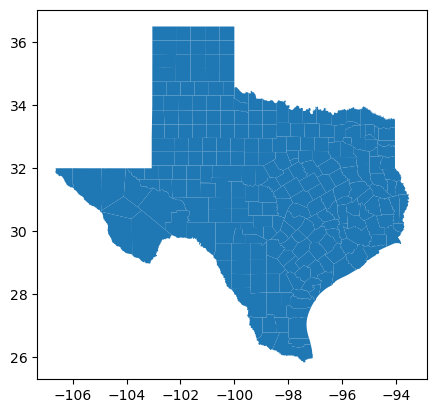

In [3]:
import fiona
import geopandas as gpd

# Use Fiona's environment context to restore the SHX file automatically
with fiona.Env(SHAPE_RESTORE_SHX='YES'):
    counties = gpd.read_file("tl_2022_us_county.shp")

# Filter for Texas counties (STATEFP "48")
tx_counties = counties[counties['STATEFP'] == '48']

# Now you can work with tx_counties (e.g., plot or merge with your data)
tx_counties.plot()

In [4]:
def extract_scalar(x):
    # If x is an array with one element, extract that element;
    # if it has more than one element and you want the first, use x[0].
    if isinstance(x, np.ndarray):
        return x[0]  # or np.mean(x) if you prefer the average
    return x

In [5]:
merged = tx_counties.merge(df, left_on="NAME", right_on="CTYNAME", how="left")

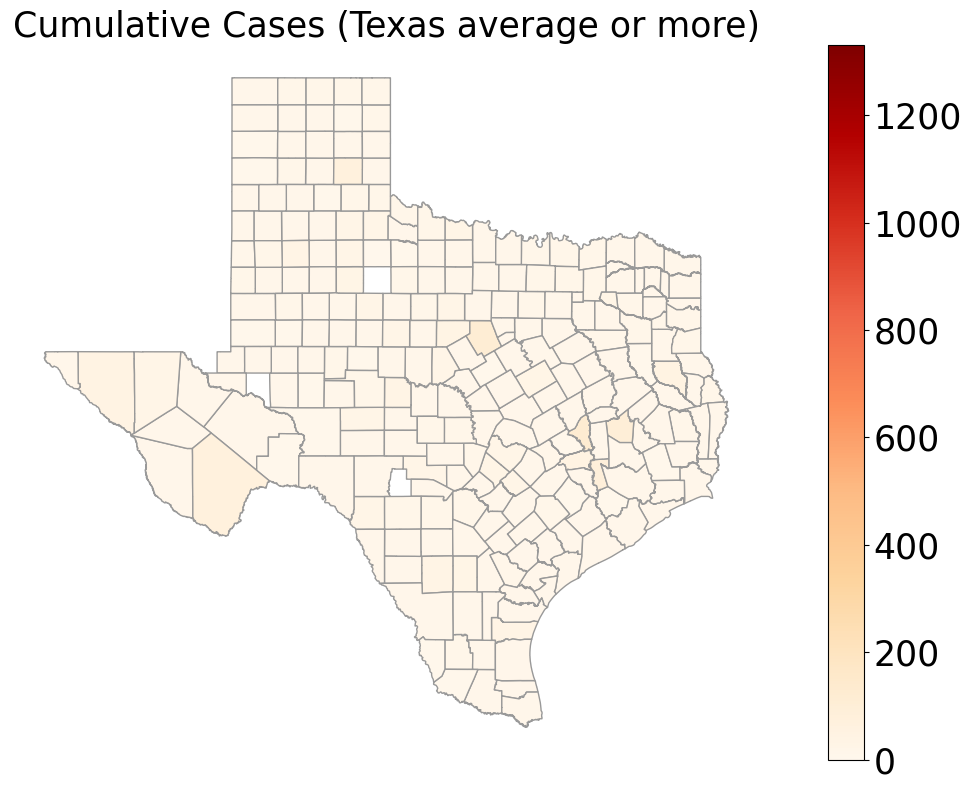

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Apply extract_scalar function to ensure numeric values
merged["Cum_inf"] = merged["Cum_inf"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf", cmap="OrRd", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=1330))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 1330  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="OrRd", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases (Texas average or more)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()

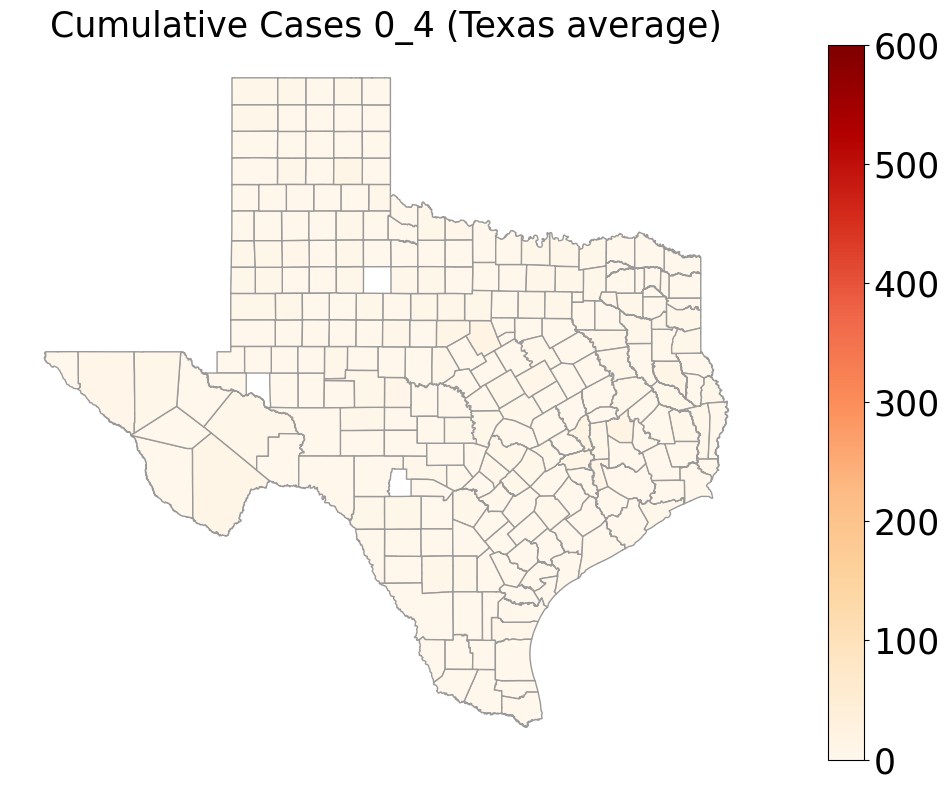

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Apply extract_scalar function to ensure numeric values
merged["Cum_inf_0"] = merged["Cum_inf_0"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_0", cmap="OrRd", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=600))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 600  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="OrRd", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases 0_4 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()

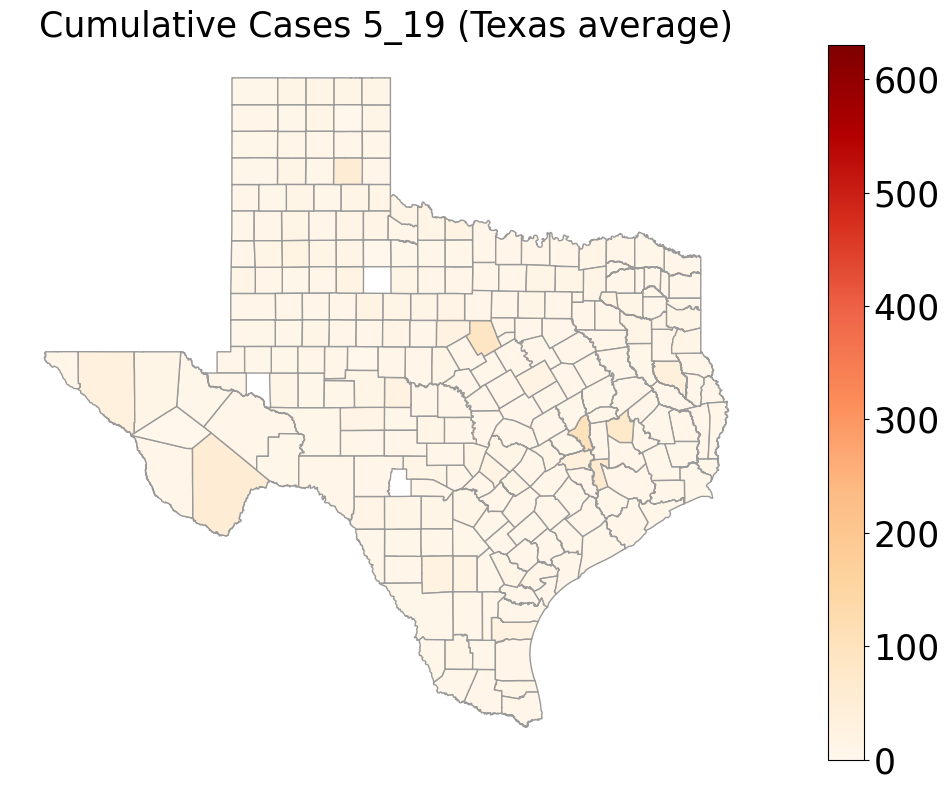

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Apply extract_scalar function to ensure numeric values
merged["Cum_inf_1"] = merged["Cum_inf_1"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_1", cmap="OrRd", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=630))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 630  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="OrRd", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases 5_19 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()

In [9]:
# Rank the counties by "Cum_inf_100k" in descending order and select the top 10
top10 = merged.sort_values(by="Cum_inf", ascending=False).head(10)

# Display the top 10 counties
print(top10)

    STATEFP COUNTYFP  COUNTYNS  GEOID         NAME            NAMELSAD LSAD  \
13       48      041  01383806  48041       Brazos       Brazos County   06   
52       48      143  01383857  48143        Erath        Erath County   06   
100      48      471  01384021  48471       Walker       Walker County   06   
71       48      473  01384022  48473       Waller       Waller County   06   
220      48      043  01383807  48043     Brewster     Brewster County   06   
129      48      129  01383850  48129       Donley       Donley County   06   
43       48      477  01384024  48477   Washington   Washington County   06   
105      48      347  01383959  48347  Nacogdoches  Nacogdoches County   06   
122      48      229  01383900  48229     Hudspeth     Hudspeth County   06   
24       48      133  01383852  48133     Eastland     Eastland County   06   

    CLASSFP  MTFCC  CSAFP  ...  Cum_inf_1_high  Cum_inf_2 Cum_inf_2_low  \
13       H1  G4020    NaN  ...      126.258544   4.6522

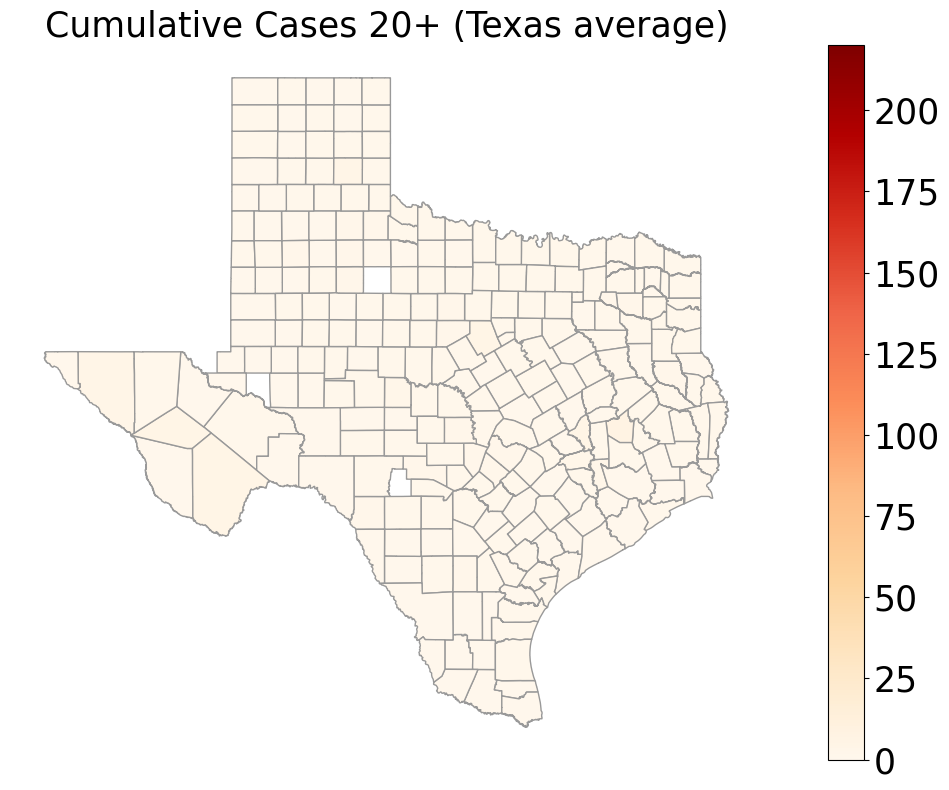

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Apply extract_scalar function to ensure numeric values
merged["Cum_inf_2"] = merged["Cum_inf_2"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_2", cmap="OrRd", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=220))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 220  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="OrRd", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases 20+ (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()

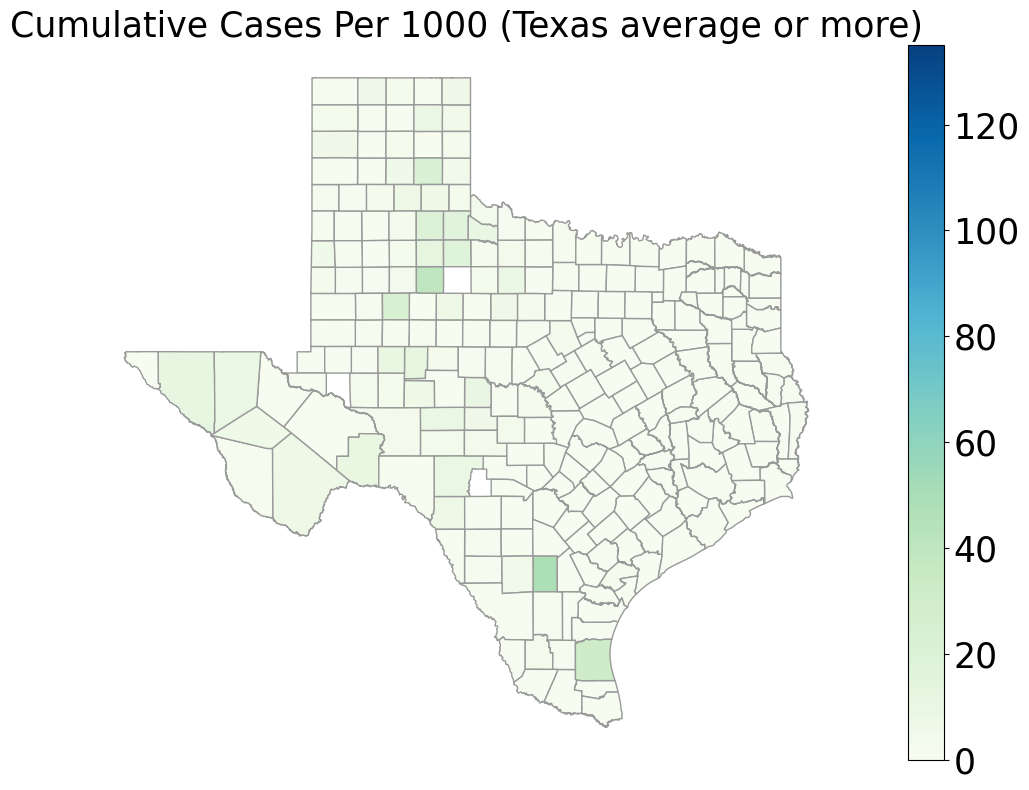

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf"] = merged["Cum_inf"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_100k"] = (merged["Cum_inf"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000
merged["Cum_inf_100k_low"] = (merged["Cum_inf_low"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000
merged["Cum_inf_100k_high"] = (merged["Cum_inf_high"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=135))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 135  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases Per 1000 (Texas average or more)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()


In [12]:
# Rank the counties by "Cum_inf_100k" in descending order and select the top 10
top10 = merged.sort_values(by="Cum_inf_100k", ascending=False).head(10)

# Display the top 10 counties
print(top10)

    STATEFP COUNTYFP  COUNTYNS  GEOID      NAME         NAMELSAD LSAD CLASSFP  \
31       48      311  01383947  48311  McMullen  McMullen County   06      H1   
197      48      263  01383917  48263      Kent      Kent County   06      H1   
213      48      261  01383916  48261    Kenedy    Kenedy County   06      H1   
214      48      033  01383802  48033    Borden    Borden County   06      H1   
129      48      129  01383850  48129    Donley    Donley County   06      H1   
90       48      345  01383958  48345    Motley    Motley County   06      H1   
209      48      269  01383920  48269      King      King County   06      H1   
148      48      101  01383836  48101    Cottle    Cottle County   06      H1   
200      48      125  01383848  48125   Dickens   Dickens County   06      H1   
122      48      229  01383900  48229  Hudspeth  Hudspeth County   06      H1   

     MTFCC  CSAFP  ...  Cum_inf_2_high  Cum_Hosp Cum_Hosp_low  Cum_Hosp_high  \
31   G4020    NaN  ...      

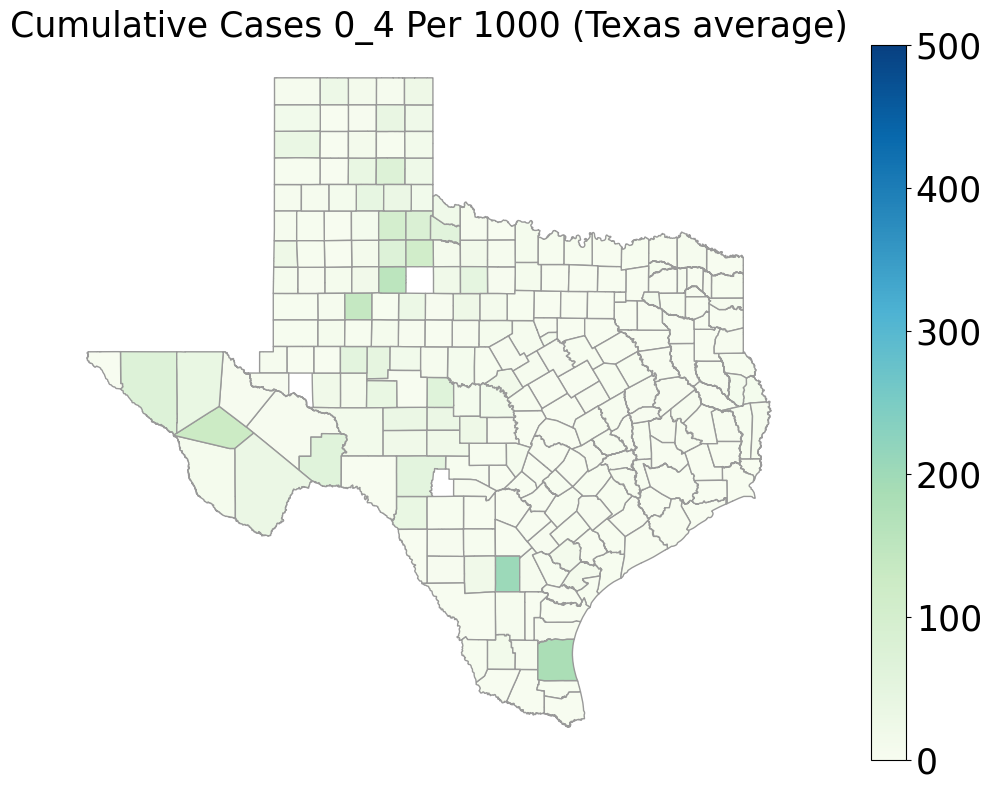

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf_0"] = merged["Cum_inf_0"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_0_100k"] = (merged["Cum_inf_0"] / (merged["0_4"])) * 1000
merged["Cum_inf_0_100k_low"] = (merged["Cum_inf_0_low"] / (merged["0_4"])) * 1000
merged["Cum_inf_0_100k_high"] = (merged["Cum_inf_0_high"] / (merged["0_4"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_0_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=500))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 500  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases 0_4 Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()


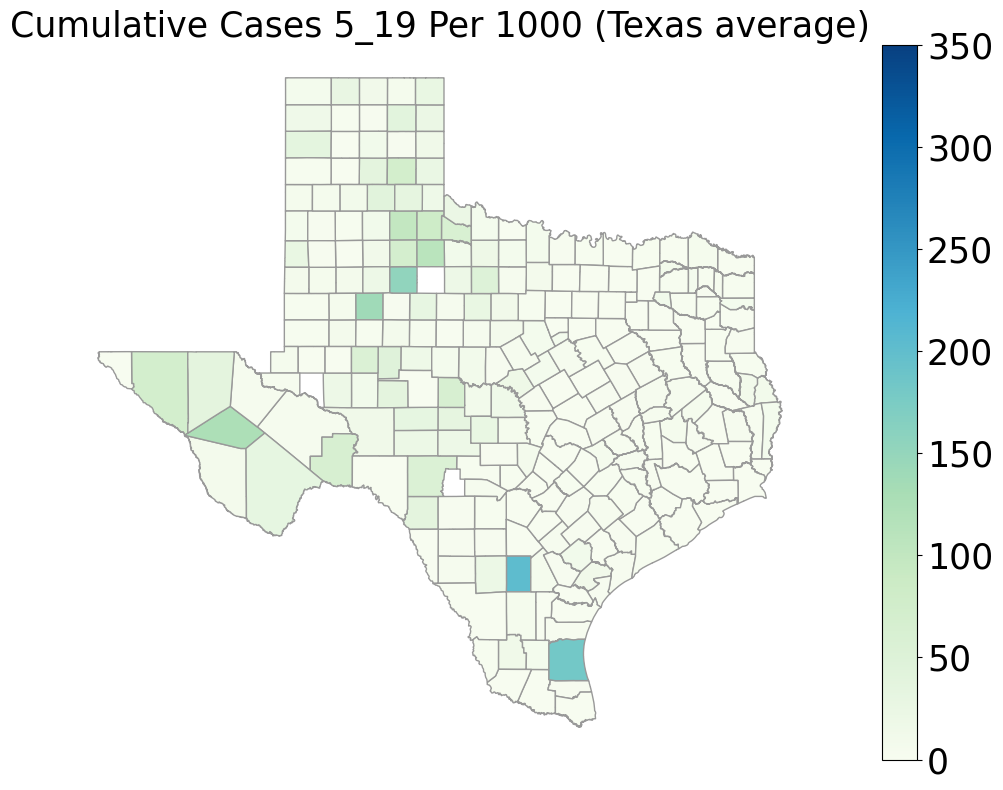

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf_1"] = merged["Cum_inf_1"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_1_100k"] = (merged["Cum_inf_1"] / (merged["5_19"])) * 1000
merged["Cum_inf_1_100k_low"] = (merged["Cum_inf_1_low"] / (merged["5_19"])) * 1000
merged["Cum_inf_1_100k_high"] = (merged["Cum_inf_1_high"] / (merged["5_19"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_0_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=350))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 350  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases 5_19 Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()


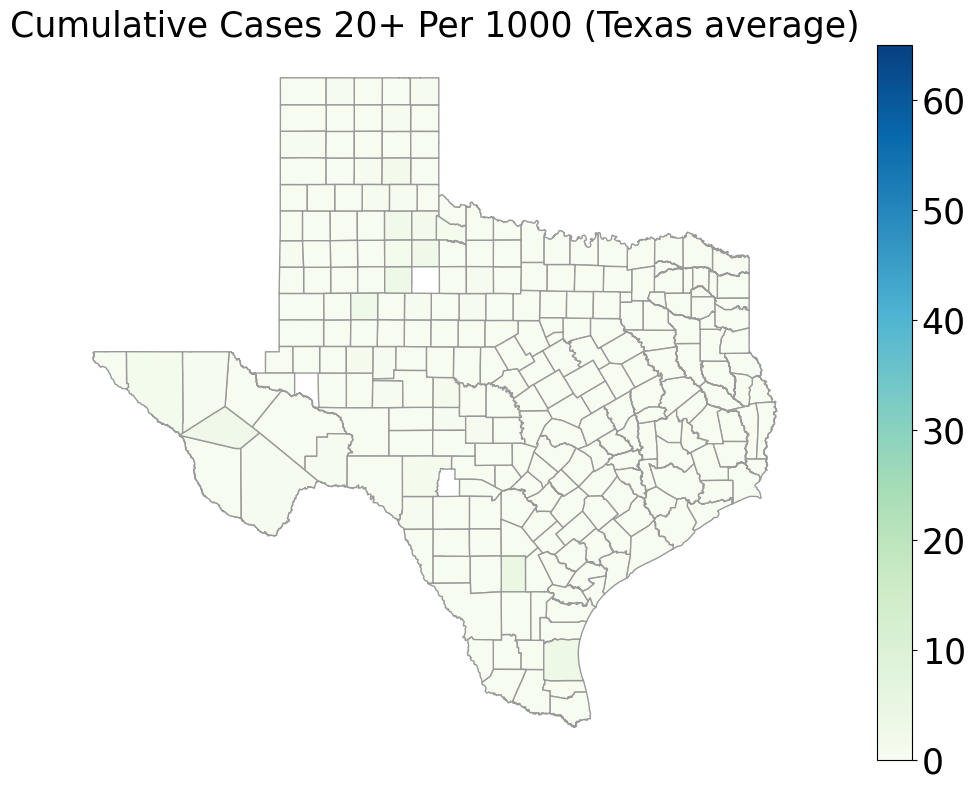

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_inf_2"] = merged["Cum_inf_2"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_inf_2_100k"] = (merged["Cum_inf_2"] / (merged["20_"])) * 1000
merged["Cum_inf_2_100k_low"] = (merged["Cum_inf_2_low"] / (merged["20_"])) * 1000
merged["Cum_inf_2_100k_high"] = (merged["Cum_inf_2_high"] / (merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_inf_2_100k", cmap="GnBu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=65))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 65  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="GnBu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Cases 20+ Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()


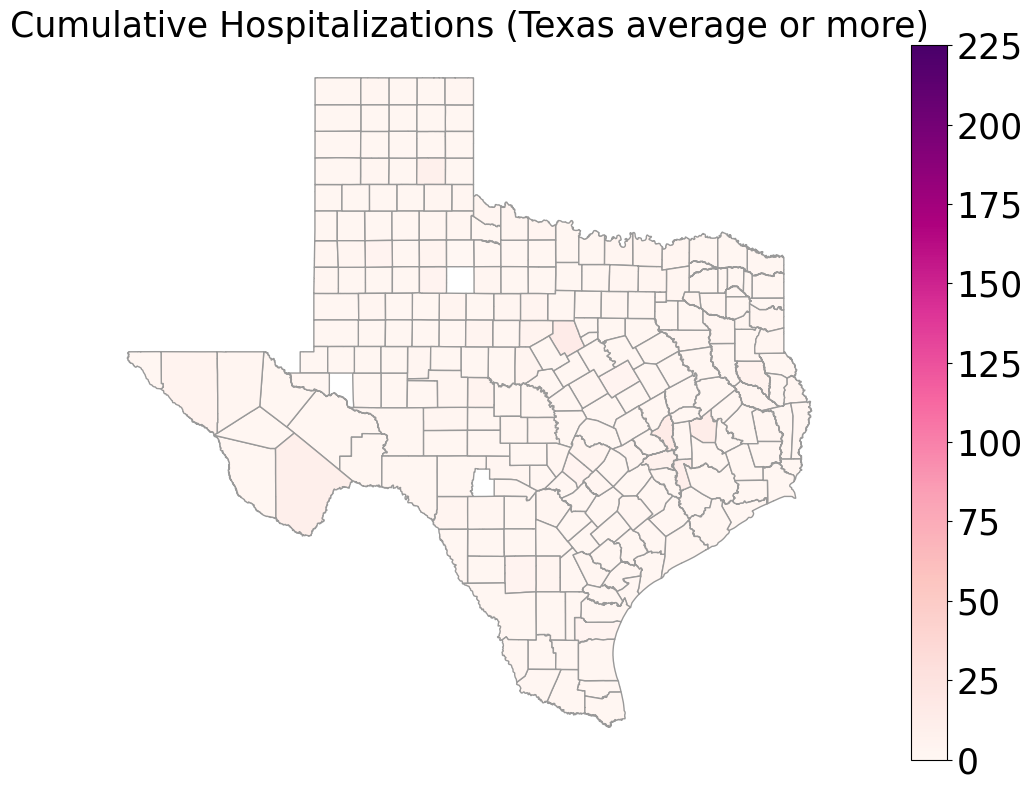

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

# Apply extract_scalar function to ensure numeric values
merged["Cum_Hosp"] = merged["Cum_Hosp"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp", cmap="RdPu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=225))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 225  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="RdPu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations (Texas average or more)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()



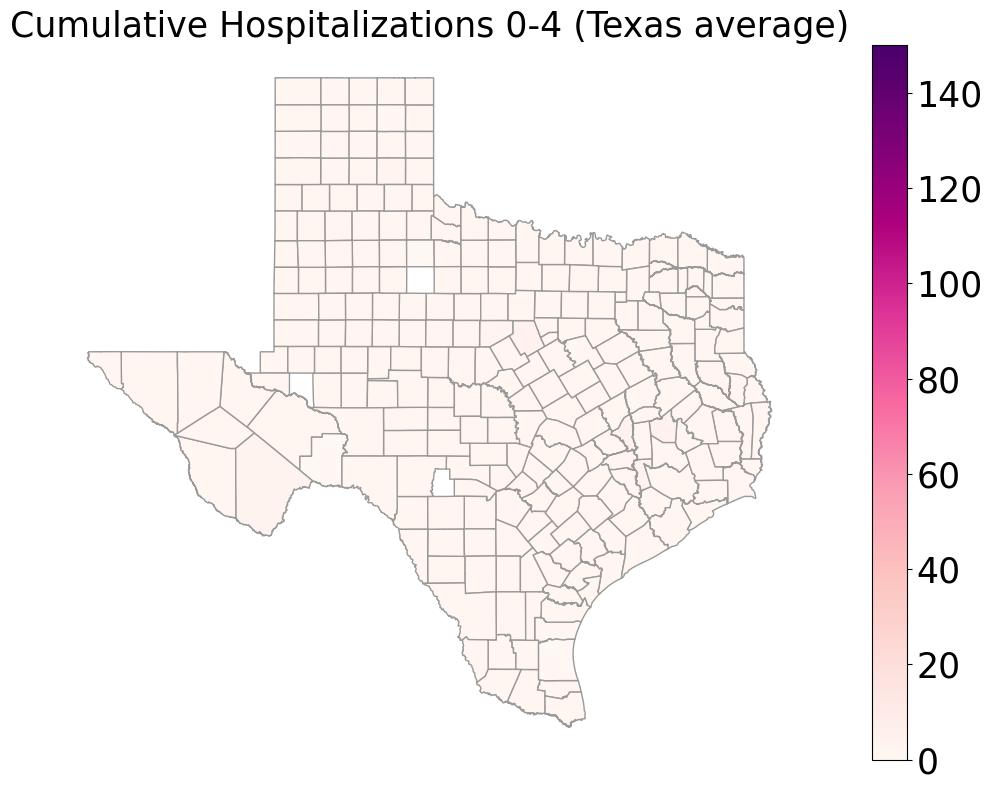

In [17]:
# Apply extract_scalar function to ensure numeric values
merged["Cum_Hosp_0"] = merged["Cum_Hosp_0"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_0", cmap="RdPu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=150))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 150  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="RdPu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations 0-4 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.savefig("1.png")
plt.show()


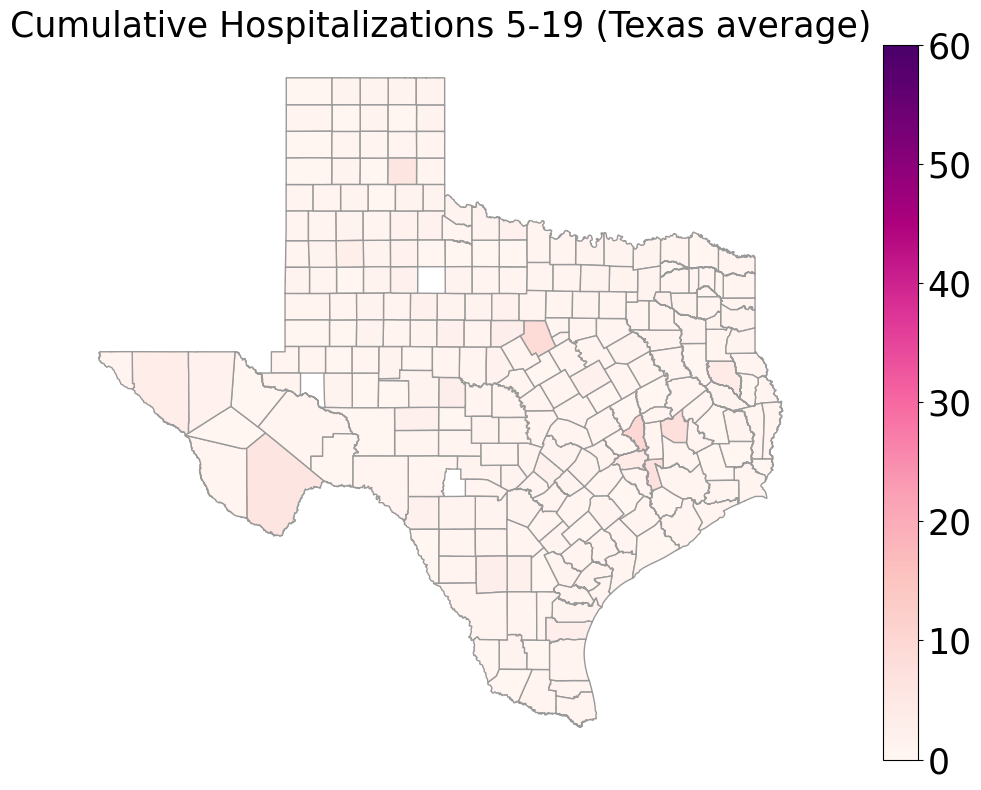

In [22]:
# Apply extract_scalar function to ensure numeric values
merged["Cum_Hosp_1"] = merged["Cum_Hosp_1"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_1", cmap="RdPu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=60))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 60  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="RdPu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations 5-19 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()


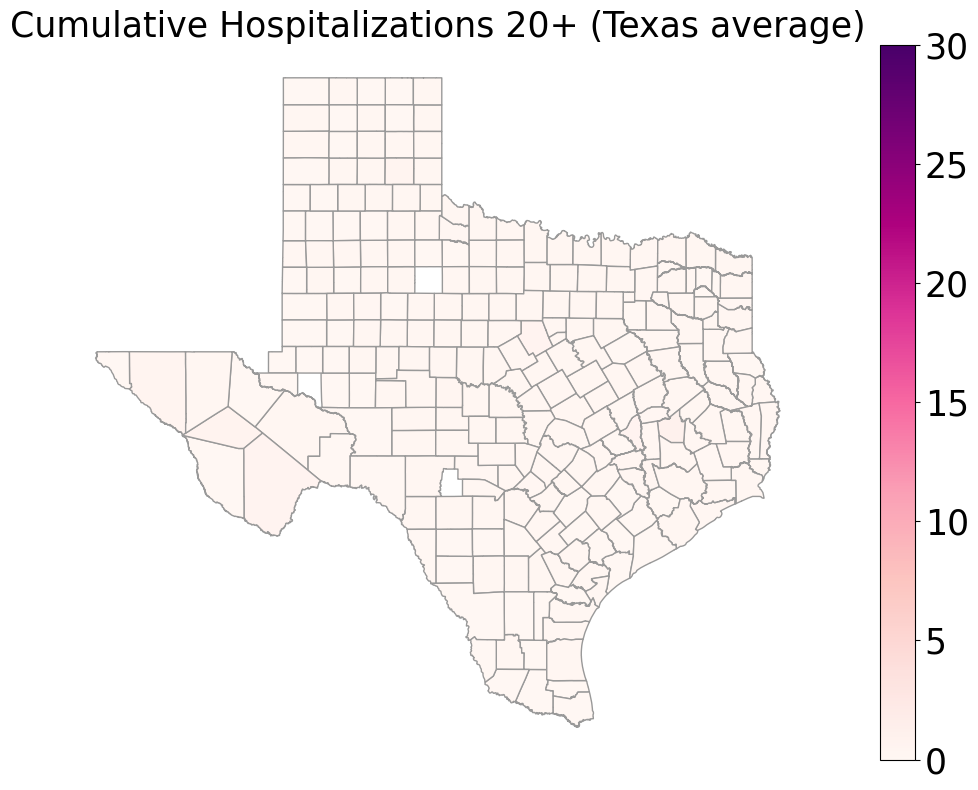

In [23]:
# Apply extract_scalar function to ensure numeric values
merged["Cum_Hosp_2"] = merged["Cum_Hosp_2"].apply(extract_scalar)

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_2", cmap="RdPu", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=30))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 30  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="RdPu", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations 20+ (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()


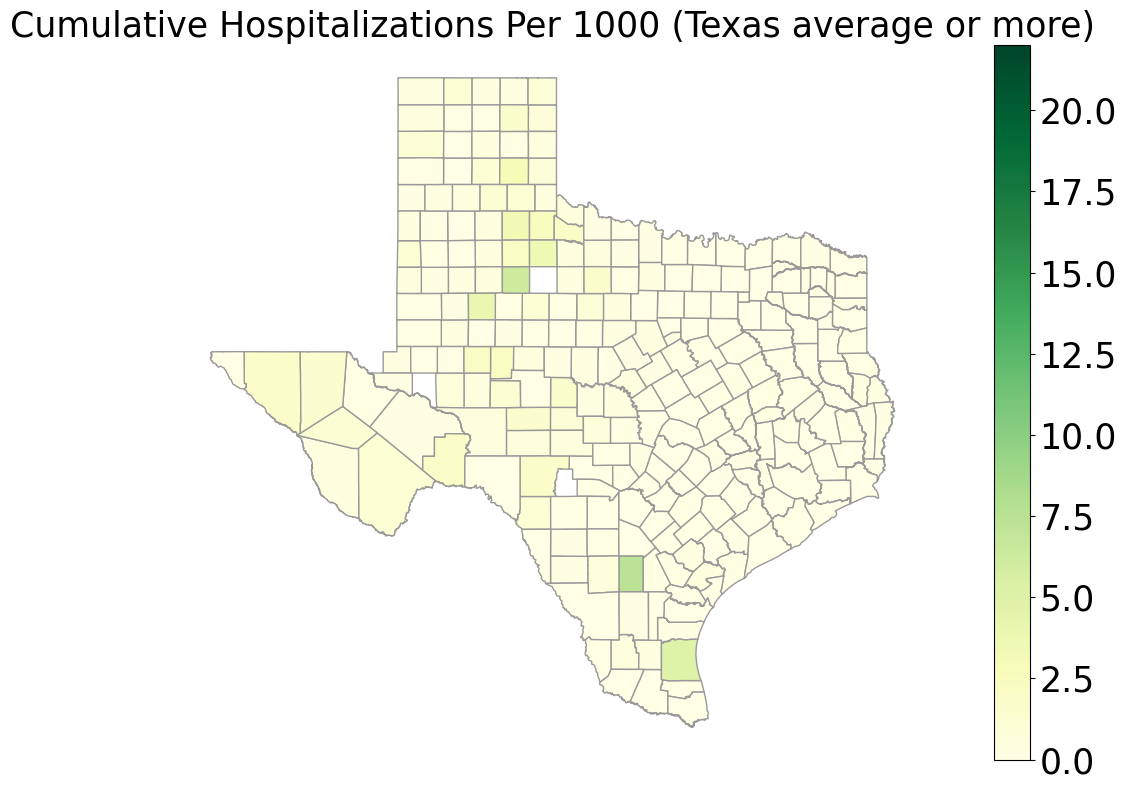

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp"] = merged["Cum_Hosp"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_100k"] = (merged["Cum_Hosp"] / (merged["0_4"] + merged["5_19"] + merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=22))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 22  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations Per 1000 (Texas average or more)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()


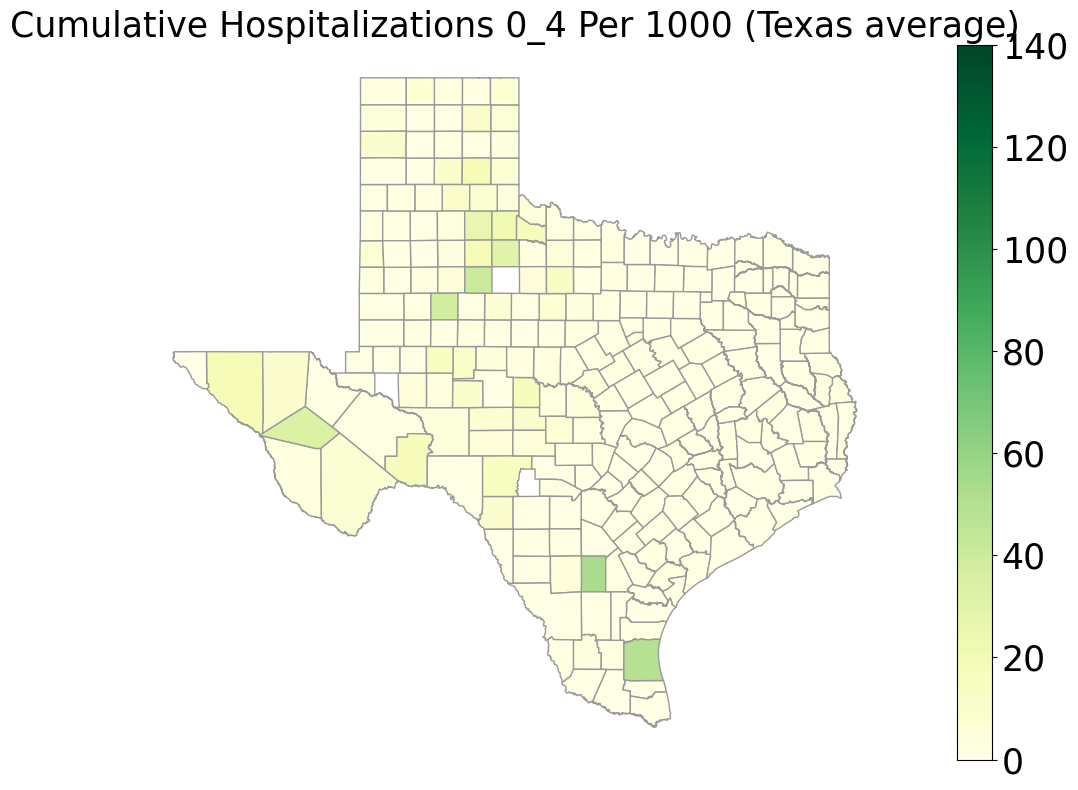

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp_0"] = merged["Cum_Hosp_0"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_0_100k"] = (merged["Cum_Hosp_0"] / (merged["0_4"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_0_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=140))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 140  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations 0_4 Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()

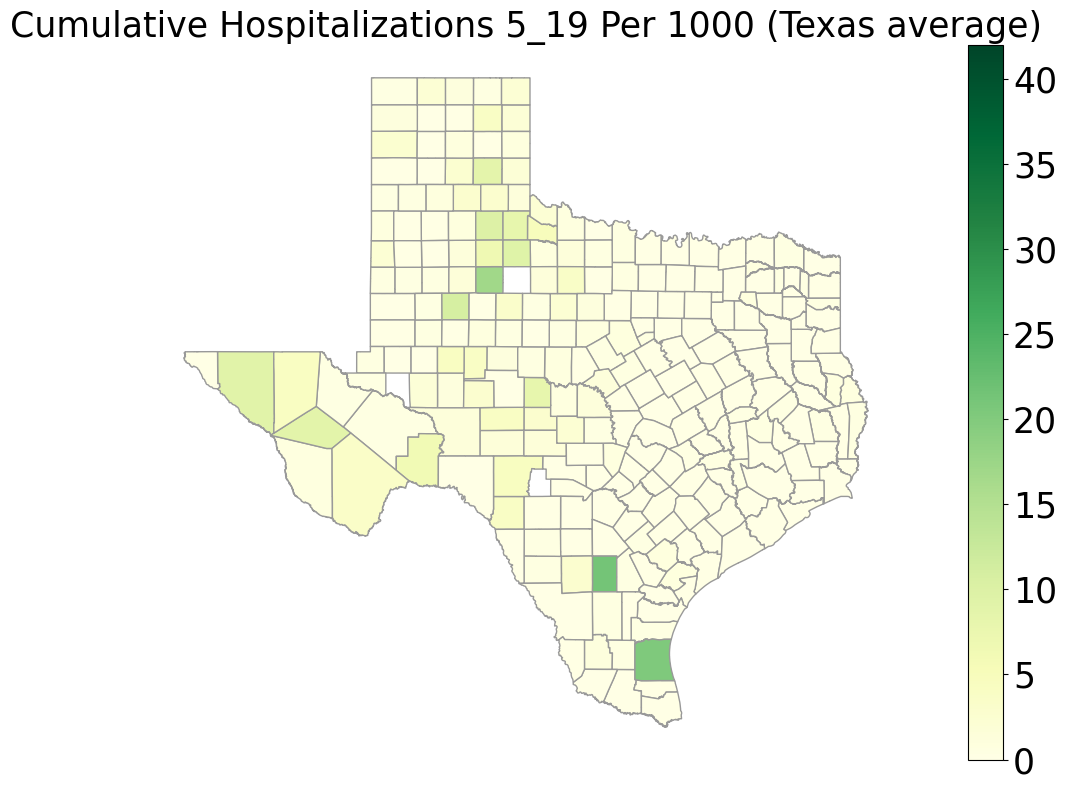

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp_1"] = merged["Cum_Hosp_1"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_1_100k"] = (merged["Cum_Hosp_1"] / (merged["5_19"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_1_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=42))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 42  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations 5_19 Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()

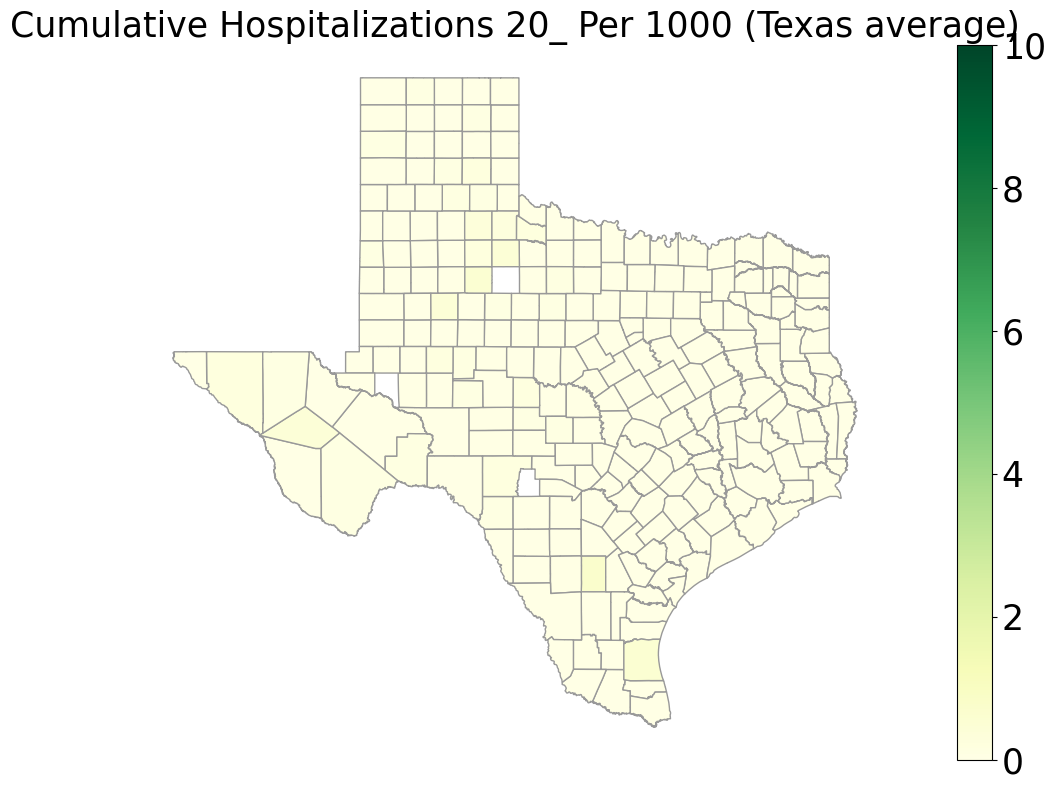

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

merged["Cum_Hosp_2"] = merged["Cum_Hosp_2"].apply(extract_scalar)
merged["0_4"] = merged["0_4"].apply(extract_scalar)
merged["5_19"] = merged["5_19"].apply(extract_scalar)
merged["20_"] = merged["20_"].apply(extract_scalar)

# Now recalculate your incidence column
merged["Cum_Hosp_2_100k"] = (merged["Cum_Hosp_2"] / (merged["20_"])) * 1000

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map using original values, but **forcing** the color scale to 0-1330
merged.plot(column="Cum_Hosp_2_100k", cmap="YlGn", linewidth=1, ax=ax, edgecolor="0.6",
            norm=mpl.colors.Normalize(vmin=0, vmax=10))  # 🔹 Fixed color scale

# Create a colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="4%", pad=0.02)  # Adjusted spacing


# Set fixed range for color scale (0 - 1330)
vmin, vmax = 0, 10  # Fixing colorbar range
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap="YlGn", norm=norm)

# Create the colorbar
cbar = fig.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=25)  # Increase colorbar font size
#cbar.ax.set_title("Avg Incidence", fontsize=14)

# Clean up plot
ax.set_title("Cumulative Hospitalizations 20_ Per 1000 (Texas average)", fontsize=25)
ax.set_axis_off()

plt.tight_layout()
plt.show()